In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


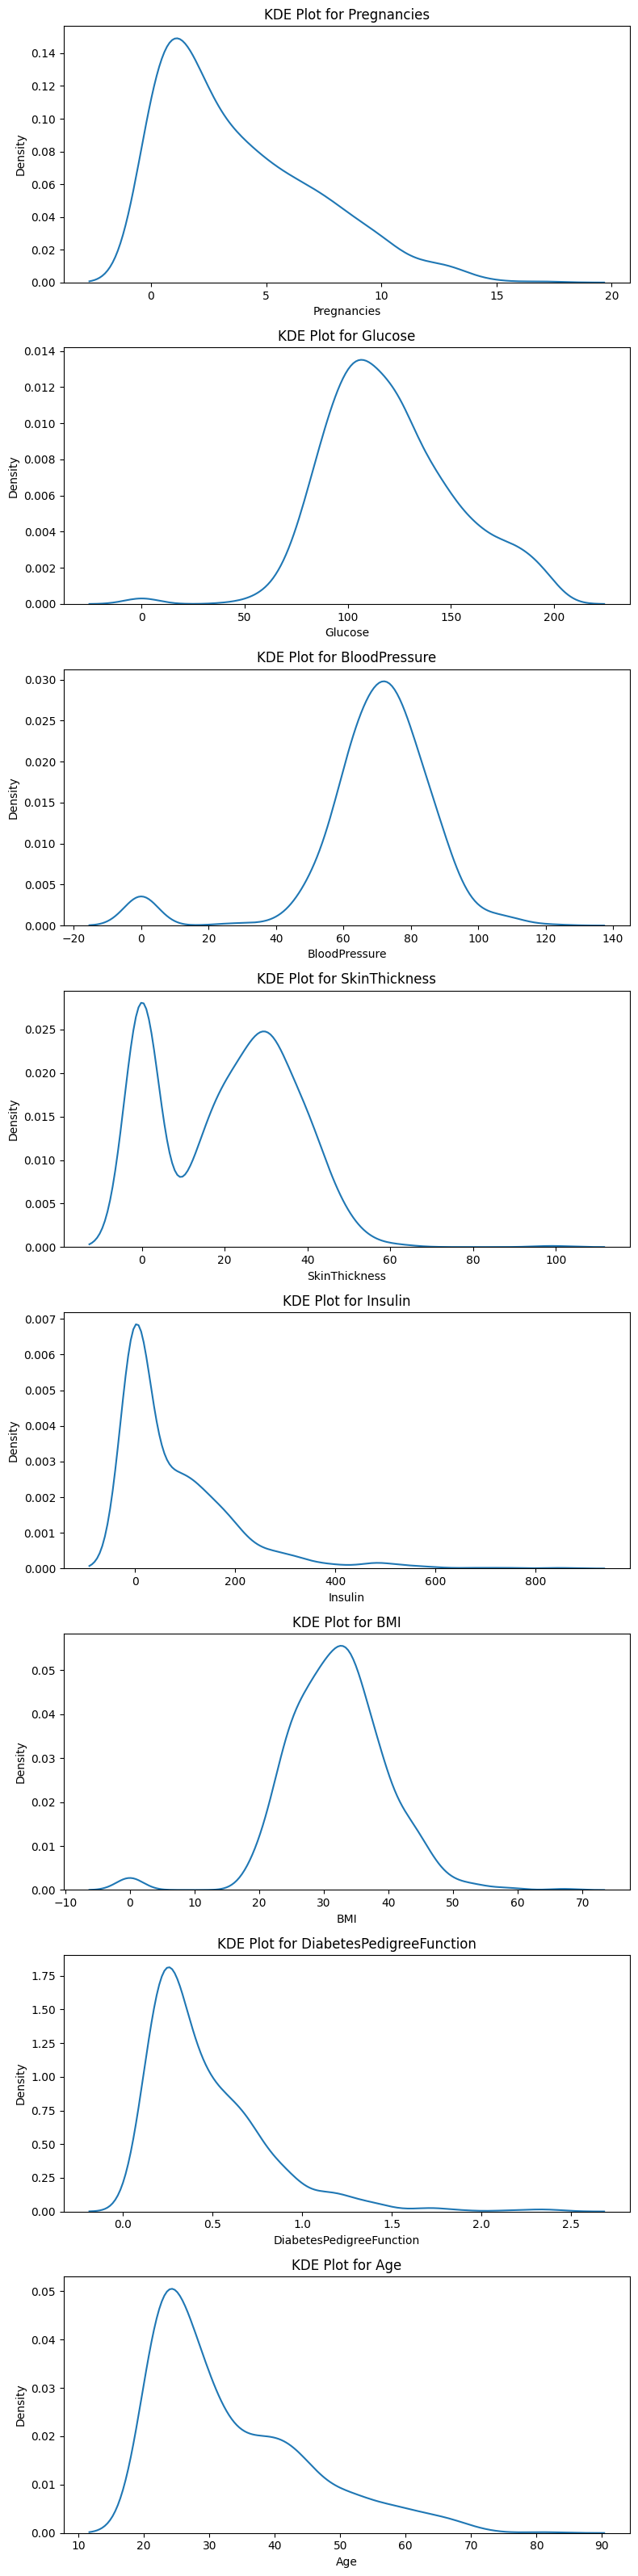

In [6]:
lis=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
fig, axes = plt.subplots(nrows=len(lis), ncols=1, figsize=(8, 4 * len(lis)))

# Loop through variables and create individual KDE plots
for i, var in enumerate(lis):
    sns.kdeplot(x=var, data=data, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {var}')

plt.tight_layout()
plt.show()

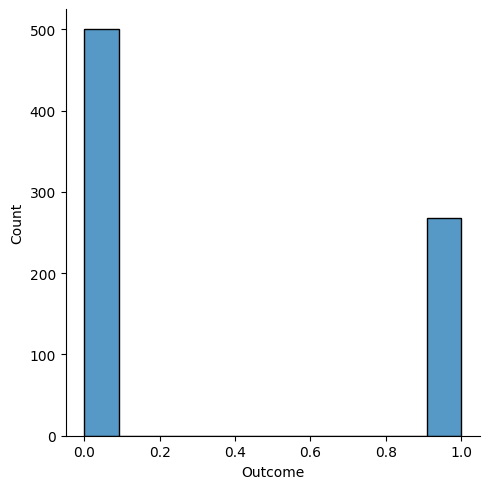

In [7]:
sns.displot(x='Outcome',data=data)

In [11]:
class_counts = data['Outcome'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
majority_indices = data[data['Outcome'] == majority_class].index
random_indices = np.random.choice(majority_indices, size=class_counts[minority_class], replace=False)
data = data.drop(random_indices)

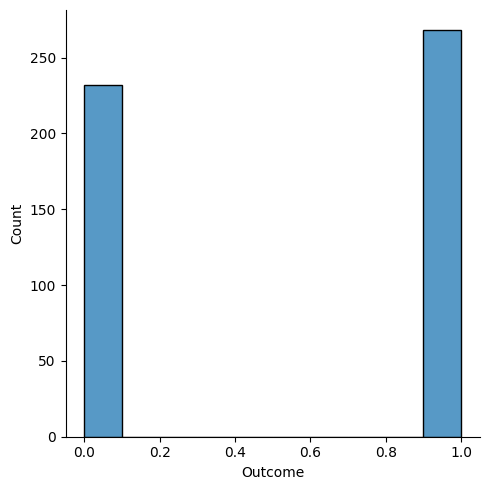

In [12]:
sns.displot(x='Outcome',data=data)

In [30]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [33]:
po=PowerTransformer()
x=po.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
lc=LogisticRegression()
lc.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lc.predict(x_test)

In [29]:
from sklearn.metrics import f1_score,precision_score
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"precision_score={pr}")
print(f"f1_score={f1}")

precision_score=0.7735849056603774
f1_score=0.7735849056603775
